# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Files to load
city_data_to_load = "Resource/city_data.csv"
ride_data_to_load = "Resource/ride_data.csv"

# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

# Read the ride data file and store it in a pandas Dataframe.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()



,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [2]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Merge the DataFrames

In [3]:
# Get the number of rides for urban cities.
ride_data_type_count = pyber_data_df.groupby(["type"])["ride_id"].count()
ride_data_type_count.head()



type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
Driver_count_df = pyber_data_df.groupby("type")["driver_count"].sum()
Driver_count_df.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [5]:
fare_df = pyber_data_df.groupby("type")["fare"].sum()
fare_df.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [7]:
fare_df/ride_data_type_count

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [9]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


## Deliverable 1: Get a Summary DataFrame 

In [10]:
#  1. Get the total rides for each city type

ride_data_type_count = pyber_data_df.groupby(["type"])["ride_id"].count()
ride_data_type_count.head()


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [11]:
# 2. Get the total drivers for each city type
Driver_count_df = pyber_data_df.groupby("type")["driver_count"].sum()
Driver_count_df.head()


type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [12]:
#  3. Get the total amount of fares for each city type
fare_df = pyber_data_df.groupby("type")["fare"].sum()
fare_df.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [13]:
#  4. Get the average fare per ride for each city type. 
avg_fare_ride_df = fare_df/ride_data_type_count
avg_fare_ride_df.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [14]:
# 5. Get the average fare per driver for each city type. 
avg_driver_fare_df = fare_df/Driver_count_df
avg_driver_fare_df.head()

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [15]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df= pd.DataFrame({
    "Total Rides":ride_data_type_count, 
    "Total Drivers": Driver_count_df,
    "Total Fares": fare_df, 
    "Average Fare per Ride": avg_fare_ride_df, 
    "Average Fare per Driver": avg_driver_fare_df})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [16]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [17]:
#  8. Format the columns.
round(pyber_summary_df)

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,4328.0,35.0,8.0
Suburban,625,8570,19356.0,31.0,2.0
Urban,1625,59602,39854.0,25.0,1.0


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [18]:
# 1. Read the merged DataFrame
new_pyber_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
new_pyber_df.head()

/var/folders/bx/btp71ppj2y32jft8xzhjzjw00000gn/T/ipykernel_91027/2892424252.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_pyber_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]


type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
Name: fare, dtype: float64

In [19]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
new_pyber_df = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
new_pyber_df.head()

/var/folders/bx/btp71ppj2y32jft8xzhjzjw00000gn/T/ipykernel_91027/4243724171.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_pyber_df = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]


fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [20]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
new_pyber_df = new_pyber_df.reset_index()
new_pyber_df.tail()

,type,date,fare
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77
2374,Urban,2019-05-08 13:10:18,18.04


In [21]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
new_pyber_df = new_pyber_df.pivot(index= "date", columns="type", values="fare")
new_pyber_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [28]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_pyber_df = new_pyber_df.loc['2019-01-01':'2019-04-28']
new_pyber_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [29]:
new_pyber_df.index = pd.to_datetime(new_pyber_df.index)
new_pyber_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [30]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
new_pyber_df.index = pd.to_datetime(new_pyber_df.index)
new_pyber_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [31]:
# 7. Check that the datatype for the index is datetime using df.info()
new_pyber_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [39]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
new_pyber_week = new_pyber_df.resample("w").sum()
new_pyber_week.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


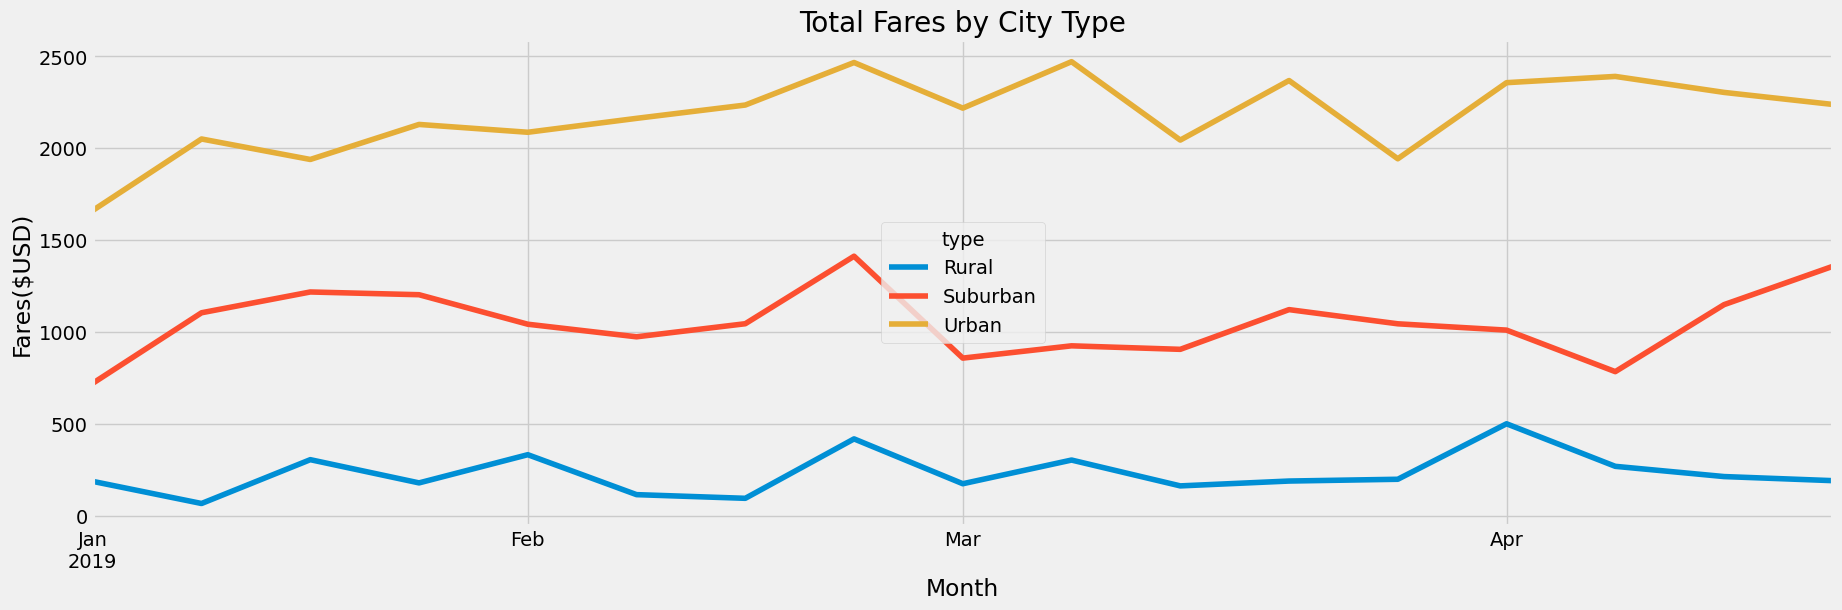

<Figure size 640x480 with 0 Axes>

In [42]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
weekly_fares = new_pyber_week.plot(figsize = (20,6))
# Add a title 
weekly_fares.set_title("Total Fares by City Type")
#  Add a x- and y-axis label.
weekly_fares.set_xlabel("Month")
weekly_fares.set_ylabel("Fares($USD)")

plt.show()
plt.tight_layout()
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig("Pyber_fare_summary.png")


In [43]:
pwd


'/Users/ryanmarshall/Documents/Data Analytics Folder/Completed Work/Class/Pyber_Analysis'